<h1>Recapss: The willingness of the entrepreneurs to open their capital to external investors.</h1>

<h5>Quels sont les facteurs d’influence psychologique et économique favorisant la cession de participations d’une entreprise, ou en d’autres termes la dilution partielle ou totale de ses « equities » ?</h5>



<h2>Etude et analyse des resultats du questionnaire administre aux entrepreneurs</h2>
<p>Nous allons, dans ce notebook, etudier les resultats de questionnaire administre aux entrepreneurs. Nous commencerons par traiter les donnees, puis nous analyserons en details ces dernieres</p>

In [158]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off python errors or warning, click <a href="javascript:code_toggle_err()">here</a>.''')

<h3>Partie 1: Preprocessing</h3>
<p>On va traiter les donnees brut du questionnaire google afin de pouvoir les analyser en detail</p>

In [235]:
global data
data = pd.read_csv("assets/answers.csv"); #import the result table
data[:10]

,Horodateur,Sexe,Age,Indiquez votre niveau d'étude,Domaine d'étude,finance_link,Année de création,Domaines,Nombre d'employés,Localisation (entrez votre département),Avez vous ouvert votre capital ?,"Si non, prévoyez-vous de l'ouvrir ?",Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital,"Sur une échelle de 0 à 5, l'entrée des investisseur vous a t-elle apporte les effets escomptes ?",Comment qualifierez vous vos investisseurs ?,Nombre d'années après la création de l’entreprise ?,Est-ce votre première ouverture ?
0,20/11/2018 00:35:11,Femme,29,Bac +5 ou plus,Science sociales/ Éco-gestion,Je suis issu ou travaille dans la finance,2017,Commerce / Négoce / Distribution,0,75,Oui,NaN,Besoin de fonds pour prototypage,5.0,Business Angels,"1,5",Oui
1,20/11/2018 05:24:54,Homme,30,Bac +5 ou plus,Ingénierie/ Science,Aucune connaissance,2015,Services aux entreprises,7,75,Oui,Oui,Besoin de fonds pour prototypage,10.0,Business Angels,2,Oui
2,20/11/2018 06:54:24,Homme,41,Bac +5 ou plus,Ingénierie/ Science,J'ai acquis des connaissances personnelles au ...,2005,Machines et équipements / Automobile,20,47,Oui,Non,"Besoin de fond pour croître, Besoin de fonds p...",5.0,Business Angels,4,Oui
3,20/11/2018 06:54:25,Femme,36,Bac +5 ou plus,Science sociales/ Éco-gestion,Proches (amis ou famille) travaillant dans ce ...,2017,Services aux entreprises,2,75,Oui,NaN,Besoin de fonds pour prototypage,8.0,Business Angels,1,Oui
4,20/11/2018 09:38:42,Homme,48,Bac +5 ou plus,Science sociales/ Éco-gestion,Je suis issu ou travaille dans la finance,2015,Études et conseils,8,75,Non,Oui,Pas de nécessité pour l’entreprise,NaN,NaN,NaN,NaN
5,20/11/2018 10:04:51,Homme,47,Bac +5 ou plus,Ingénierie/ Science,J'ai acquis des connaissances personnelles au ...,2016,Informatique / Télécoms,3,94,Non,Oui,Pas de nécessité pour l’entreprise,NaN,NaN,NaN,NaN
6,20/11/2018 11:39:09,Homme,51,Bac +5 ou plus,Science sociales/ Éco-gestion,J'ai acquis des connaissances personnelles au ...,2016,Services aux entreprises,3,75,Non,Oui,Besoin de fond pour croître,NaN,NaN,NaN,NaN
7,20/11/2018 16:09:21,Homme,21,Post Bac,Droit ou sciences politiques,J'ai acquis des connaissances personnelles au ...,2017,Édition / Communication / Multimédia,15,75,Non,Oui,"Besoin de fond pour croître, Besoin de fonds p...",NaN,NaN,NaN,NaN
8,21/11/2018 08:36:11,Homme,55,Bac +3,Science sociales/ Éco-gestion,J'ai acquis des connaissances personnelles au ...,2013,Électronique / Électricité,6,75,Oui,NaN,Besoin de fond pour croître,3.0,Business Angels,3,Oui
9,28/11/2018 15:47:49,Femme,24,Bac +5 ou plus,Science sociales/ Éco-gestion,J'ai acquis des connaissances personnelles au ...,2016,Services aux entreprises,3,75,Oui,Oui,"Besoin de fond pour croître, Besoin de fonds p...",6.0,Business Angels,2,Oui


<p> Le premier constat que l'on peut faire ici concerne la premiere colone, elle n'est pas utilse dans le cadre de notre etude.</p>

In [236]:
data = data.drop("Horodateur", axis = 1)
data.columns.values

array(['Sexe', 'Age', "Indiquez votre niveau d'étude", "Domaine d'étude",
       'finance_link', 'Année de création', 'Domaines',
       "Nombre d'employés ", 'Localisation (entrez votre département) ',
       'Avez vous ouvert votre capital ?',
       "Si non, prévoyez-vous de l'ouvrir ? ",
       "Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital",
       "Sur une échelle de 0 à 5, l'entrée des investisseur vous a t-elle apporte les effets escomptes ?",
       'Comment qualifierez vous vos investisseurs ?',
       "Nombre d'années après la création de l’entreprise ?",
       'Est-ce votre première ouverture ?'], dtype=object)

<p>Avant de proceder a une analyse plus precise de nos donnees voyons quels nombre differents d'entree nous avons pour chaque colonne.</p>

In [237]:

print(data.nunique())

Sexe                                                                                                 2
Age                                                                                                 13
Indiquez votre niveau d'étude                                                                        3
Domaine d'étude                                                                                      4
finance_link                                                                                         5
Année de création                                                                                    5
Domaines                                                                                             8
Nombre d'employés                                                                                   10
Localisation (entrez votre département)                                                              5
Avez vous ouvert votre capital ?                                         

<p>Le premier constat que l'on peu tirer, c'est que les colones "Comment qualifierez vous vos investisseurs ?" et "Est-ce votre première ouverture ?" ne vont pas pouvoir etre utilisees dans notre analyse puisqu'elle ne permet de distinguer en quoi que ce soit les entrepreneurs ayant remplis notre questionnaire. Nous la supprimerons donc.</p>
<p>Ensuite, nous pouvons nous interesser aux colonnes contenant seulements 2 reponses differentes.</p>

In [261]:
#data = data.drop('Comment qualifierez vous vos investisseurs ? ',axis=1)

print('Sexe: ', data.Sexe.unique())
print('Avez vous ouvert votre capital ? :', data['Avez vous ouvert votre capital ?'].unique())
print("Si non, prévoyez-vous de l'ouvrir ? :", data["Si non, prévoyez-vous de l'ouvrir ? "].unique())

Sexe:  ['Femme' 'Homme']
Avez vous ouvert votre capital ? : ['Oui' 'Non']
Si non, prévoyez-vous de l'ouvrir ? : [nan 'Oui' 'Non']


In [265]:
nominal_columns = ["Sexe", "Avez vous ouvert votre capital ?", "Si non, prévoyez-vous de l'ouvrir ? "]
filtered_data = data
dummy_df = pd.get_dummies(data[nominal_columns])
filtered_data = pd.concat([filtered_data, dummy_df], axis=1)
filtered_data = filtered_data.drop(nominal_columns, axis=1)

<p>On constate ici que beaucoup de colones vont devoir recevoir un traitement, puisque celles ci ne sont pas des nombres (les types 'object'). Pour nos calculs, nous avons besoin de nombres (int64, entiers ou float64, decimaux)</p>
<p>Pour le traitement de celles ci, plusieurs methodes s'offrent a nous afin de proceder au traitement de celles-ci. Nous en utiliserons 2 principales ici</p>
<p>Tout d'abord, comprenons les deux types que nous avons dans notre ensemble de données et comment nous pouvons les convertir en donnees numériques :

<ul><li><b>Valeurs ordinales :</b> ces valeurs sont dans l'ordre naturel. C'est-à-dire que vous pouvez les trier ou les commander par ordre croissant ou décroissant.</li>

<li><b>Valeurs nominales :</b> ce sont des valeurs régulières. On ne peux pas ordonner les valeurs nominales.</li>
<li><b>Valeurs booleenes :</b> ces valeurs n'ont en fait que 2 valeurs, vrai ou faux. C'est un sous ensemble des valeurs nominales, a ceci pret que si nous creeons une nouvelle colone pour chaque valeur differente dans notre colone a traiter, nous n'auront besoin que d'une seule colonne pour les valeurs booleenes.</li>
</ul>
</p>

<p>Voici les colonnes que nous avons maintenant dans notre ensemble de données :
<ul>
    <li>Valeurs ordinales</li>
<li>finance_link: le lien des entrepreneurs avec la finance</li>
<li>le niveau d'etude</li>
<li>Domaine d'études</li>
<li>Domaines</li>
<li>Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital</li>
<li>finalité</li>
<li>terme</li>
    </ul>
<p>Il existe différentes approches pour traiter chacun de ces deux types. Dans les étapes suivantes, nous allons convertir chacun d'entre eux en conséquence.</p>



In [266]:
mapping_dict = {
    "finance_link": {
        "Aucune connaissance": 0,
        "J'ai acquis des connaissances personnelles au cours du temps": 1,
        "Proches (amis ou famille) travaillant dans ce secteur": 2,
        "Conseillers privés": 3,
        "Je suis issu ou travaille dans la finance": 4,
    },
    "Indiquez votre niveau d'étude":{
        "Post Bac": 0,
        "Bac": 1,
        "Bac +3": 2,
        "Bac +5 ou plus": 3
    }
}
filtered_data = filtered_data.replace(mapping_dict)
filtered_data[['finance_link','Indiquez votre niveau d\'étude']].head()


,finance_link,Indiquez votre niveau d'étude
0,4,3
1,0,3
2,1,3
3,2,3
4,4,3


<p>On à ici réarangé nos 2 colonnes, en introduisant une hierarchie dans les réponses, comme précisé dans les dictionnaires de mappage </p>

<p>Il est plus complexe de convertir les valeurs nominales en nombre. Notons qu’ici, nous n'aurons pas à effectuer de calculs sur toute notre plage de données, comme cela aurait pu être le cas si nous voulions appliquer des algorithmes de machine learning sur nos données. Cela signifie qu’il n’est pas forcément utile de dissocier ces données afin d’obtenir un tableau ne contenant que des chiffres. Nous laisserons donc ces colonnes en l'état.
</p>

In [267]:
col = { 'Sexe_Homme': 'man',
        'Age': 'age',
        'Indiquez votre niveau d\'étude': 'study_level',
        'finance_link':'finance_link',
        'Année de création': 'age_comp',
        "Domaine d'étude": 'study_domain' ,
        'Domaines': 'domain',
        "Nombre d'employés ": "employee_number" ,
        'Localisation (entrez votre département) ': "location",
        'Avez vous ouvert votre capital ?_Oui': 'willing_open_capital',
        "Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital": "capital_reason",
        "Sur une échelle de 0 à 5, l'entrée des investisseur vous a t-elle apporte les effets escomptes ?": "investor_contribution",
        "Nombre d'années après la création de l’entreprise ?":"opening_capital_time"
         }
filtered_data = filtered_data.drop(["Comment qualifierez vous vos investisseurs ?","Est-ce votre première ouverture ?","Sexe_Femme",'Avez vous ouvert votre capital ?_Non',"Si non, prévoyez-vous de l'ouvrir ? _Non","Si non, prévoyez-vous de l'ouvrir ? _Oui"], axis=1)
filtered_data.rename(columns=col, inplace=True)
filtered_data[:10]

,age,study_level,study_domain,finance_link,age_comp,domain,employee_number,location,capital_reason,investor_contribution,opening_capital_time,man,willing_open_capital
0,29,3,Science sociales/ Éco-gestion,4,2017,Commerce / Négoce / Distribution,0,75,Besoin de fonds pour prototypage,5.0,"1,5",0,1
1,30,3,Ingénierie/ Science,0,2015,Services aux entreprises,7,75,Besoin de fonds pour prototypage,10.0,2,1,1
2,41,3,Ingénierie/ Science,1,2005,Machines et équipements / Automobile,20,47,"Besoin de fond pour croître, Besoin de fonds p...",5.0,4,1,1
3,36,3,Science sociales/ Éco-gestion,2,2017,Services aux entreprises,2,75,Besoin de fonds pour prototypage,8.0,1,0,1
4,48,3,Science sociales/ Éco-gestion,4,2015,Études et conseils,8,75,Pas de nécessité pour l’entreprise,NaN,NaN,1,0
5,47,3,Ingénierie/ Science,1,2016,Informatique / Télécoms,3,94,Pas de nécessité pour l’entreprise,NaN,NaN,1,0
6,51,3,Science sociales/ Éco-gestion,1,2016,Services aux entreprises,3,75,Besoin de fond pour croître,NaN,NaN,1,0
7,21,0,Droit ou sciences politiques,1,2017,Édition / Communication / Multimédia,15,75,"Besoin de fond pour croître, Besoin de fonds p...",NaN,NaN,1,0
8,55,2,Science sociales/ Éco-gestion,1,2013,Électronique / Électricité,6,75,Besoin de fond pour croître,3.0,3,1,1
9,24,3,Science sociales/ Éco-gestion,1,2016,Services aux entreprises,3,75,"Besoin de fond pour croître, Besoin de fonds p...",6.0,2,0,1


<p>Nos données étant maintenant traitées, nous allons pouvoir passer à l’analyse ce celles-ci.
</p>
<h3>Partie 2: Analyse</h3>
<p>Etudions l'existence d'une relation lineaire entre la volonte d'ouvrir son capital et les autres entrees.</p>
<p>Python nous permet de rapidement calculer le coefficient de correlation et de l’afficher sous forme de “heatmap”, qui nous permet de visualiser rapidement le lien sous forme de matrice colorée</p>


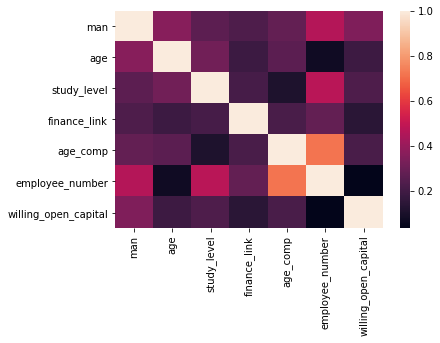

In [269]:
columns_for_corr = ['man','age',"study_level","finance_link","age_comp","employee_number","willing_open_capital"]
corr_matrix = filtered_data[columns_for_corr].apply(lambda x: (x-x.mean())/x.mean()).corr()
corr_matrix = corr_matrix.apply(lambda x: abs(x))
sns.heatmap(corr_matrix, annot=False)


Man who did not open their capital     35.714286
Man who open their capital             28.571429
Woman who opens their capital          28.571429
Woman wo did not open theri capital     7.142857
dtype: float64


([<matplotlib.patches.Wedge at 0x11f967e48>,
 [Text(0.47727208651780734, 0.9910657674599294, 'Man who did not open their capital'),
  Text(-1.1, 1.3471114790620887e-16, 'Man who open their capital'),
  Text(0.2447729126007754, -1.0724207295912054, 'Woman who opens their capital'),
  Text(1.072420660839281, -0.24477321382259143, 'Woman wo did not open theri capital')])

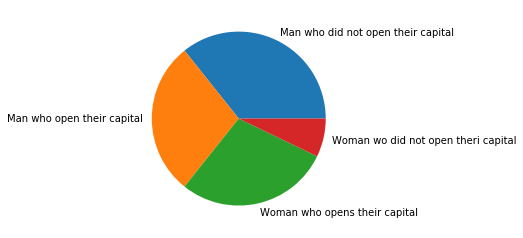

In [211]:

sexe_matrix = filtered_data[['Sexe_Homme',"Avez vous ouvert votre capital ?_Oui"]].apply(lambda x: (x["Sexe_Homme"], x["Avez vous ouvert votre capital ?_Oui"]),axis=1).value_counts()
sexe_matrix = sexe_matrix.apply(lambda x: (x*100)/sexe_matrix.sum())
rows={(1,0): "Man who did not open their capital", (1,1): "Man who open their capital", (0,1):'Woman who opens their capital',(0,0):"Woman wo did not open theri capital"}
sexe_matrix = sexe_matrix.rename(rows, axis='index')
print(sexe_matrix)
plt.pie(sexe_matrix, labels=sexe_matrix.index)

In [69]:
sexe_man_matrix = filtered_data[['man',"willing_open_capital"]]
sexe_man_matrix = sexe_man_matrix[sexe_man_matrix.Sexe_Homme == 1].apply(lambda x:x["willing_open_capital"],axis=1).value_counts()
# 
sexe_man_matrix = sexe_man_matrix.apply(lambda x: (x*100)/sexe_man_matrix.sum())
rows={1: "Percentage of man who open their capital", 0: "Percentage of man who did not open their capital"}
sexe_man_matrix = sexe_man_matrix.rename(rows, axis='index')
print(sexe_man_matrix)

Percentage of man who did not open their capital    55.555556
Percentage of man who open their capital            44.444444
dtype: float64


In [278]:
sexe_woman_matrix = filtered_data[['man',"willing_open_capital"]]
sexe_woman_matrix = sexe_woman_matrix[sexe_woman_matrix.man == 0].apply(lambda x: x["willing_open_capital"],axis=1).value_counts()
sexe_woman_matrix = sexe_woman_matrix.apply(lambda x: (x*100)/sexe_woman_matrix.sum())
rows={1: "Percentage of woman who open their capital", 0: "Percentage of woman who did not open their capital"}
sexe_woman_matrix = sexe_woman_matrix.rename(rows, axis='index')
print(sexe_woman_matrix)

Percentage of woman who open their capital            80.0
Percentage of woman who did not open their capital    20.0
dtype: float64


<div class="alert alert-success"><b>Conclusion:</b> les femmes ouvrent plus leur capital que les hommes.</div>

In [280]:
finance_matrix = filtered_data[['finance_link',"willing_open_capital",'man']]

print("Pourcentage d'hommes ayant la volonte d'ouvrir leur capital en fonction de leur connaissance du secteur financier" )
finance_matrix = finance_matrix[finance_matrix["man"]==1]
counter_matrix= finance_matrix.finance_link.value_counts()
finance_matrix = finance_matrix[finance_matrix["willing_open_capital"]==1]['finance_link'].value_counts()
for x in range(0,5):
    try:
        print(x, ' :' ,finance_matrix[x]*100/counter_matrix[x])
    except:
        print(x, ' : 0' )

# finance_matrix = finance_matrix.apply(lambda x: x.name)
# # rows={1: "Percentage of woman who open their capital", 0: "Percentage of woman who did not open their capital"}
# # sexe_woman_matrix = sexe_woman_matrix.rename(rows, axis='index')
# print(finance_matrix)
# print(counter_matrix)

Pourcentage d'hommes ayant la volonte d'ouvrir leur capital en fonction de leur connaissance du secteur financier
0  : 100.0
1  : 50.0
2  : 0
3  : 0
4  : 0


<div class="alert alert-success"><b>Conclusion:</b> Pas de lien reel entre le niveau de connaissance du secteur fi et la volonte d'ouvrir son capital</div>

In [229]:
finance_matrix = filtered_data[['finance_link',"willing_open_capital"]]
counter_matrix= finance_matrix.finance_link.value_counts()

finance_matrix = finance_matrix[finance_matrix["willing_open_capital"]==1]['finance_link'].value_counts()
print("Pourcentage d'ouverture du capital en fonction de la connaissance du secteur financier" )
for x in range(0,5):
    print(x, ' :' ,finance_matrix[x]*100/counter_matrix[x])

Pourcentage d'ouverture du capital en fonction de la connaissance du secteur financier
0  : 100.0
1  : 50.0
2  : 100.0
3  : 100.0
4  : 33.333333333333336


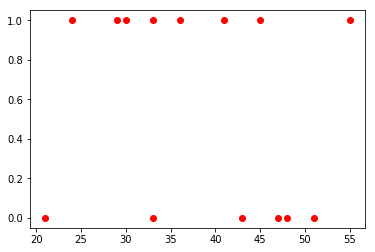

In [282]:
age_matrix = filtered_data[['age',"willing_open_capital"]]
age_matrix = age_matrix.set_index(age_matrix['age']).drop(['age'],axis=1)
age_matrix.sort_index(inplace=True)
plt.plot(age_matrix['willing_open_capital'],'ro')

<div class="alert alert-success"><b>Conclusion:</b> Pas de lien reel entre l'age et la volonte d'ouvrir son capital</div>

In [283]:
study_level_matrix = filtered_data["study_level"].value_counts()
study_level_matrix = study_level_matrix.apply(lambda x: (x*100)/study_level_matrix.sum())
print("Niveau d'etude, en pourcentage")
print(study_level_matrix)

Niveau d'etude, en pourcentage
3    85.714286
2     7.142857
0     7.142857
Name: study_level, dtype: float64


<div class="alert alert-success"><b>Conclusion:</b> Comme precise avant, le niveaux d'etude des entrepreneurs interroge n'est pas assez disparate pour que cela puisse etre reellement signifactif (nous n'avons ici pu recolter que des entrepreuneurs ayant un bac+5 ou plus.</div>

<p> Interessons nous maintenant a l'age, la maturite de l'entreprise. Nous voundrions donc savoir si le fait d'avoir une entreprise plus ancienne joue sur la volonte d'ouvrir (ou non), son capital. Pour cela, nous etudierons la volonte d'ouverture du capital, en fonction de l'age relatif de la startup (2018 - Annee de creation)</p> 

In [159]:
comp_date_matrix = filtered_data[["Année de création","Avez vous ouvert votre capital ?_Oui"]]
comp_date_matrix["Age_entreup"] = comp_date_matrix["Année de création"].apply(lambda x: 2019-x)
comp_date_matrix = comp_date_matrix.drop(['Année de création'], axis=1)
counter_matrix= comp_date_matrix.Age_entreup.value_counts()

comp_date_matrix = comp_date_matrix[comp_date_matrix["Avez vous ouvert votre capital ?_Oui"]==1]['Age_entreup'].value_counts()
comp_date_matrix.sort_index(inplace=True)

print("Pourcentage d'ouverture du capital en fonction de l'age de l'entreprise" )
for x in comp_date_matrix.index:
    print(x, ' :' ,comp_date_matrix[x]*100/counter_matrix[x])

Pourcentage d'ouverture du capital en fonction de l'age de l'entreprise
2  : 75.0
3  : 40.0
4  : 33.333333333333336
6  : 100.0
14  : 100.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<div class="alert alert-success"><b>Conclusion:</b> On remarque alors que si les valeurs sont disparate pour les jeunes entreprise (moins de 5 ans), il y a un palier (5 ans donc) au delà duquel l’entrepreneur semble avoir totalement accepter l'idée d’ouvrir son capital. Cela est certainement dû à une nécessité pour l’entreprise, et l’entrepreneur semble avoir, au bout de certaines annees, compris qu’il doit ouvrir son capital pour pouvoir faire progresser l’entreprise.
</div>

In [284]:
study_domain_matrix = data[["Domaine d'étude","Avez vous ouvert votre capital ?"]]
counter_matrix= study_domain_matrix["Domaine d'étude"].value_counts()

study_domain_matrix = study_domain_matrix[study_domain_matrix["Avez vous ouvert votre capital ?"]=="Oui"]["Domaine d'étude"].value_counts()
study_domain_matrix.sort_index(inplace=True)

print("Pourcentage d'ouverture du capital en fonction du domaine d'etude de l'entrepreneur" )
for x in counter_matrix.index:
    try:
        print(x, ' :' ,study_domain_matrix[x]*100/counter_matrix[x])
    except:
        print(x, ' : 0' )


Pourcentage d'ouverture du capital en fonction du domaine d'etude de l'entrepreneur
Science sociales/ Éco-gestion  : 62.5
Ingénierie/ Science  : 50.0
Médecine  : 100.0
Droit ou sciences politiques  : 0


<div class="alert alert-success"><b>Conclusion:</b> On ne peut pas tirer de reelles conclusions sur ce parametre et son lien sur la volonte (ou non) d'ouvrir son capital.
</div>

In [172]:
comp_domain_matrix = data[["Domaines","Avez vous ouvert votre capital ?"]]
counter_matrix= comp_domain_matrix["Domaines"].value_counts()

comp_domain_matrix = comp_domain_matrix[comp_domain_matrix["Avez vous ouvert votre capital ?"]=="Oui"]["Domaines"].value_counts()
comp_domain_matrix.sort_index(inplace=True)

print("Pourcentage d'ouverture du capital en fonction du domaine de l'entreprise" )
for x in counter_matrix.index:
    try:
        print(x, ' :' ,comp_domain_matrix[x]*100/counter_matrix[x])
    except:
        print(x, ' : 0' )


Pourcentage d'ouverture du capital en fonction du domaine de l'entreprise
Services aux entreprises  : 60.0
Informatique / Télécoms  : 50.0
Commerce / Négoce / Distribution  : 100.0
Édition / Communication / Multimédia  : 0
Machines et équipements / Automobile  : 100.0
Électronique / Électricité  : 100.0
Études et conseils  : 0
Textile / Habillement / Chaussure  : 0


<div class="alert alert-success"><b>Conclusion:</b> Le domaine de l’entreprise influe sur la volonté d’ouvrir son capital. En effet, dans les domaines nécessitant un investissement financier principal important (Électronique, automobile, distribution) les entrepreneurs sont toujours volontaire pour ouvrir leur capital, certainement car il n’ont pas d’autre solution pour parvenir au financement nécessaire.
</div>

In [176]:
comp_employ_matrix = data[["Nombre d'employés ","Avez vous ouvert votre capital ?"]]
counter_matrix= comp_employ_matrix["Nombre d'employés "].value_counts()
comp_employ_matrix = comp_employ_matrix[comp_employ_matrix["Avez vous ouvert votre capital ?"]=="Oui"]["Nombre d'employés "].value_counts()
counter_matrix.sort_index(inplace=True)

print("Pourcentage d'ouverture du capital en fonction du nombre d'employes de l'entreprise" )
for x in counter_matrix.index:
    try:
        print(x, ' :' ,comp_employ_matrix[x]*100/counter_matrix[x])
    except:
        print(x, ' : 0' )

Pourcentage d'ouverture du capital en fonction du domaine de l'entreprise
0  : 100.0
2  : 33.333333333333336
3  : 33.333333333333336
4  : 100.0
5  : 100.0
6  : 100.0
7  : 100.0
8  : 0
15  : 0
20  : 100.0


In [185]:
reason_matrix = data["Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital"].value_counts()
# print(reason_matrix["Pour quelle raisons avez vous (ou n'avez vous pas) ouvert votre capital"])
# reason_matrix.sort_index(inplace=True)

print("Pourcentage des raisons d'ouverture ou non du capital" )
for x in reason_matrix.index:
    try:
        print(x, ' :' ,reason_matrix[x]*100/reason_matrix.sum())
    except:
        print(x, ' : 0' )

Pourcentage des raisons d'ouverture du capital
Besoin de fond pour croître  : 42.857142857142854
Besoin de fond pour croître, Besoin de fonds pour prototypage  : 21.428571428571427
Besoin de fonds pour prototypage  : 21.428571428571427
Pas de nécessité pour l’entreprise  : 14.285714285714286


<p>Etude de l'effet escompte</p>

In [195]:
effect_matrix = data["Sur une échelle de 0 à 10, l'entrée des investisseur vous a t-elle apporte les effets escomptes ?"].value_counts()
effect_matrix.sort_index(inplace=True)

effect_matrix = effect_matrix.apply(lambda x: x*100/effect_matrix.sum()).apply(lambda x: str(int(x))+'%')
#     try:
#         print(x, ' :' ,effect_matrix[x]*100/effect_matrix.sum())
#     except:
#         print(x, ' : 0' )
print(effect_matrix)

3.0     14%
5.0     28%
6.0     14%
7.0     14%
8.0     14%
10.0    14%
Name: Sur une échelle de 0 à 5, l'entrée des investisseur vous a t-elle apporte les effets escomptes ?, dtype: object
